### （1）什么是Pipeline
- Pipeline
    - 将数据预处理、模型调用、结果后处理三部分组装成的流水线
    - 使我们能够直接输入文本便获得最终的答案
    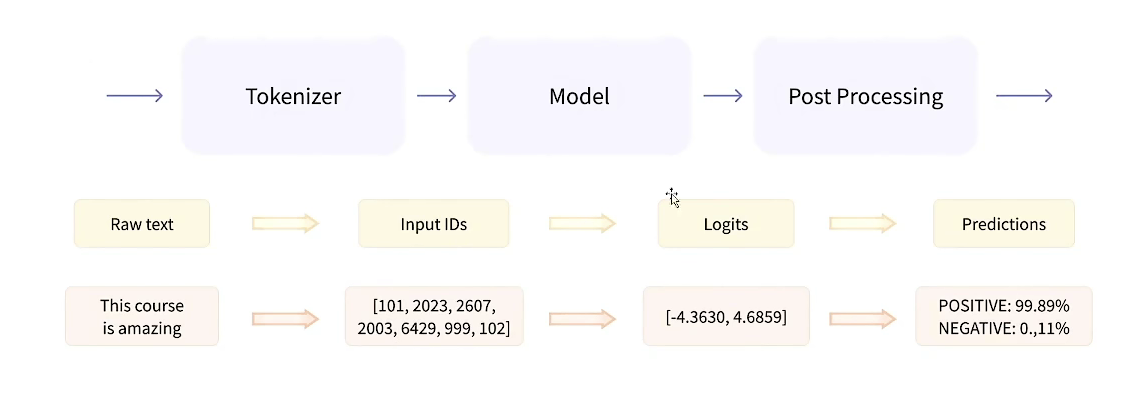

### （2）查看Pipeline支持的任务类型

In [ ]:
from transformers.pipelines import SUPPORTED_TASKS

In [ ]:
print(SUPPORTED_TASKS.items())

In [ ]:
for k,v in SUPPORTED_TASKS.items():
    print(k,v)

### （3）Pipeline的创建与使用方式

In [ ]:
from transformers import pipeline

#### 根据任务类型直接创建Pipeline,默认都是英文的模型

In [ ]:
pipe=pipeline('text-classification')

In [ ]:
pipe(['very good','vary bad!'])

#### 指定任务类型，再指定模型，创建基于指定模型的Pipeline

In [ ]:
pipe=pipeline('text-classification',model='uer/roberta-base-finetuned-dianping-chinese')

In [ ]:
pipe('我觉得不太行')

#### 预先加载模型，再创建Pipeline

In [ ]:
from transformers import AutoModelForSequenceClassification,AutoTokenizer
# 这种方式，必须同时指定model和tokenizer
model=AutoModelForSequenceClassification.from_pretrained('uer/roberta-base-finetuned-dianping-chinese')
tokenizer=AutoTokenizer.from_pretrained('uer/roberta-base-finetuned-dianping-chinese')
pipe=pipeline("text-classification", model=model, tokenizer=tokenizer)

In [ ]:
pipe('我觉得不太行')

In [ ]:
pipe.model.device

#### 确定Pipeline参数

In [ ]:
qa_pipe=pipeline("question-answering", model="uer/roberta-base-chinese-extractive-qa")

In [ ]:
qa_pipe

In [ ]:
qa_pipe(question="中国的首都是哪里？", context="中国的首都是北京", max_answer_len=1)

#### 其他Pipeline示例

In [ ]:
checkpoint="google/owlvit-base-patch32"
detector=pipeline(model=checkpoint,task="zero-shot-object-detection")

In [ ]:
import requests
from PIL import Image

url='https://unsplash.com/photos/oj0zeY2Ltk4/download?ixid=MnwxMjA3fDB8MXxzZWFyY2h8MTR8fHBpY25pY3xlbnwwfHx8fDE2Nzc0O'
im=Image.open(requests.get(url,stream=True).raw)
im

In [ ]:
predictions=detector(
    im,
    candidate_labels=['hat', "sunglasses", "book"]
)
prediction

In [ ]:
from PIL import ImageDraw

draw = ImageDraw.Draw(im)

for prediction in predictions:
    box = prediction["box"]
    label = prediction["label"]
    score = prediction["score"]
    xmin, ymin, xmax, ymax = box.values()
    draw.rectangle((xmin, ymin, xmax, ymax), outline="red", width=1)
    draw.text((xmin, ymin), f"{label}: {round(score,2)}", fill="red")

im

### （4）Pipeline背后的实现

In [ ]:
from transformers import AutoTokenizer,AutoModelForSequenceClassification
import torch

#### Step1:初始化Tokenizer

In [ ]:
tokenizer=AutoTokenizer.from_pretrained('uer/roberta-base-finetuned-dianping-chinese')

#### Step2:初始化Model

In [ ]:
model=AutoModelForSequenceClassification.from_pretrained('uer/roberta-base-finetuned-dianping-chinese')

#### Step3:数据预处理

In [ ]:
input_text='我觉得不太行'
inputs=tokenizer(input_text,return_tensors='pt')
inputs

#### Step4:模型预测

In [ ]:
res=model(**inputs)
res

In [ ]:
logits=res.logits
logits=torch.softmax(logits,dim=-1)
logits

#### Step5：结果后处理

In [ ]:
pred=torch.argmax(logits).item()
pred

In [ ]:
model.config.id2label

In [ ]:
result=model.config.id2label.get(pred)
result